In [2]:
#library yang digunakan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#memanggil data set
df = pd.read_csv('dataset1.csv')

In [4]:
#Deskripsi dataset
df.head()

,Harga,LuasTanah,LuasBangunan
0,28000000000,1100,700
1,19000000000,824,800
2,4700000000,500,400
3,4900000000,251,300
4,28000000000,1340,575


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Harga         101 non-null    int64
 1   LuasTanah     101 non-null    int64
 2   LuasBangunan  101 non-null    int64
dtypes: int64(3)
memory usage: 2.5 KB


<Axes: >

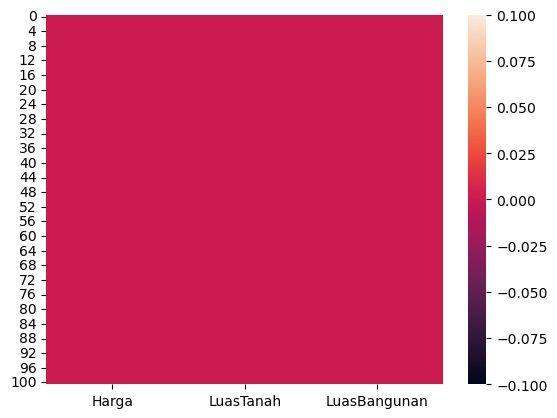

In [6]:
#melihat heatmap null 
#missing dataset
sns.heatmap(df.isnull())

In [7]:
#nilai ratarata dari data set
df.describe()

,Harga,LuasTanah,LuasBangunan
count,1.010000e+02,101.000000,101.000000
mean,1.680574e+10,546.861386,717.633663
std,1.363152e+10,415.110227,1064.316435
min,4.800000e+08,66.000000,42.000000
25%,7.250000e+09,234.000000,344.000000
50%,1.400000e+10,449.000000,456.000000
75%,2.100000e+10,780.000000,678.000000
max,8.500000e+10,2235.000000,6789.000000


<Axes: >

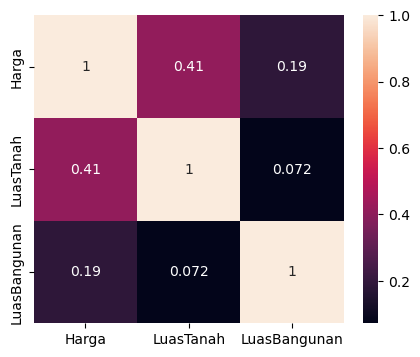

In [8]:
#Visualisasi Data
#menampilkan atribut-atribut yang menggunakan atribut numerik
plt.figure(figsize=(5,4))
sns.heatmap(df.corr(),annot=True)

In [9]:
#Jumlah Luas Bangunan berdasarkan harga
Harga = df.groupby('Harga').count()[['LuasBangunan']].sort_values(by='LuasBangunan',ascending=True).reset_index()
Harga = Harga.rename(columns={'LuasBangunan':'LuasRumah'})

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68]),
 [Text(0, 0, '480000000'),
  Text(1, 0, '670000000'),
  Text(2, 0, '2800000000'),
  Text(3, 0, '3000000000'),
  Text(4, 0, '4200000000'),
  Text(5, 0, '4250000000'),
  Text(6, 0, '4500000000'),
  Text(7, 0, '4700000000'),
  Text(8, 0, '4900000000'),
  Text(9, 0, '5000000000'),
  Text(10, 0, '5200000000'),
  Text(11, 0, '5250000000'),
  Text(12, 0, '5500000000'),
  Text(13, 0, '5680000000'),
  Text(14, 0, '5750000000'),
  Text(15, 0, '5800000000'),
  Text(16, 0, '6250000000'),
  Text(17, 0, '6500000000'),
  Text(18, 0, '7000000000'),
  Text(19, 0, '7050000000'),
  Text(20, 0, '7250000000'),
  Text(21, 0, '7500000000'),
  Text(22, 0, '7600000000'),
  Text(23, 0, '7720000000')

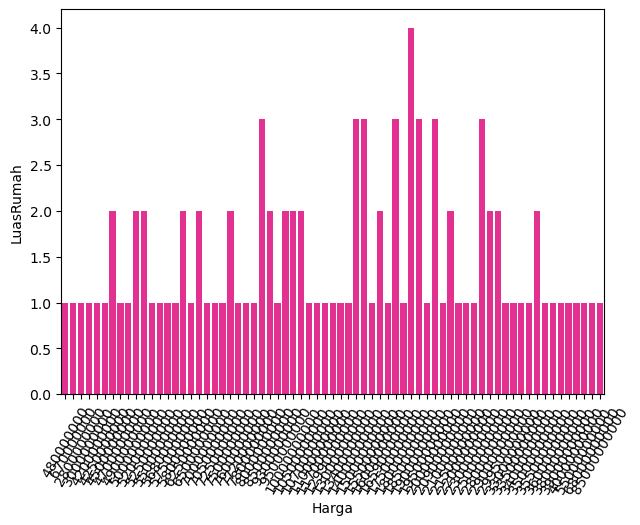

In [10]:
fig = plt.figure(figsize=(7,5))
sns.barplot(x=Harga['Harga'], y=Harga['LuasRumah'], color='deeppink')
plt.xticks(rotation=60)

In [11]:
LuasTanah = df.groupby('LuasTanah').count()[['LuasBangunan']].sort_values(by='LuasBangunan').reset_index()
LuasTanah = LuasTanah.rename(columns={'LuasBangunan':'LuasKeseluruhan'})

<Axes: xlabel='LuasTanah', ylabel='LuasKeseluruhan'>

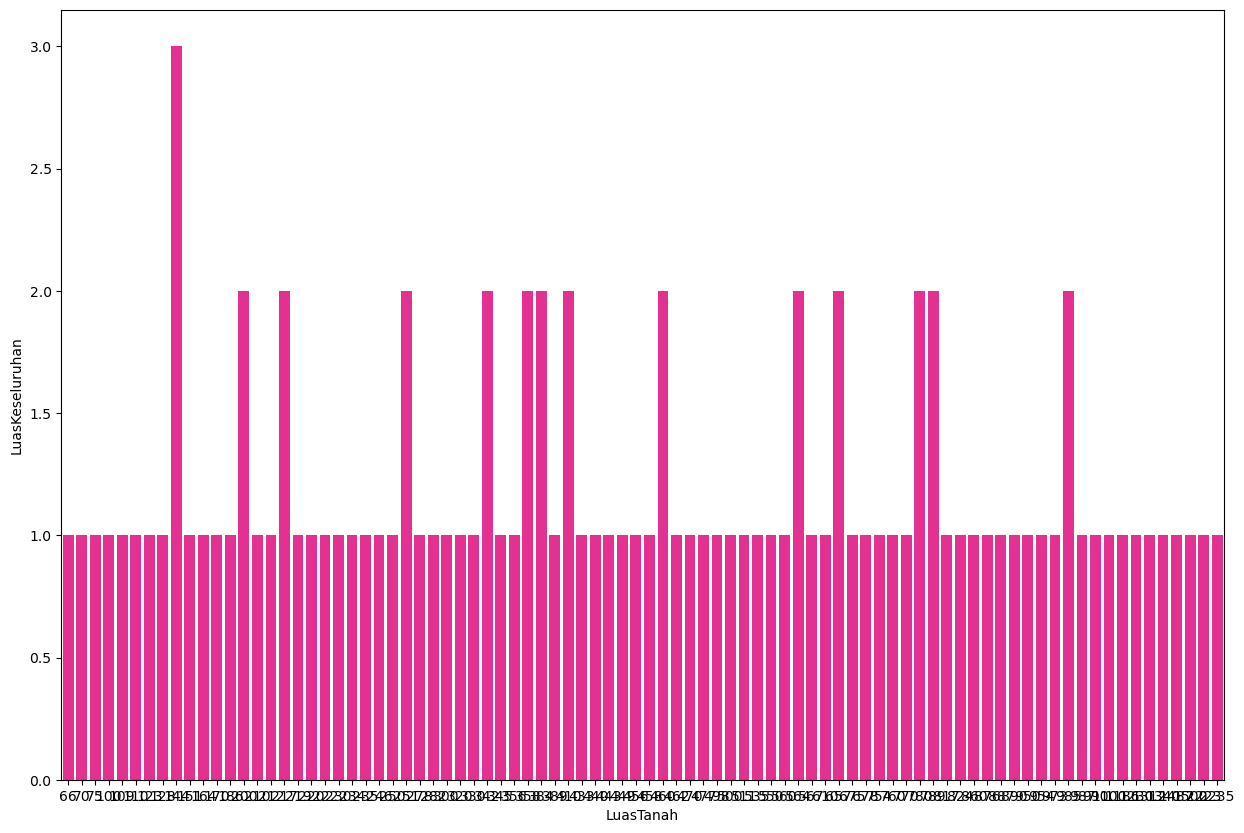

In [12]:
plt.figure(figsize=(15,10))
sns.barplot(x=LuasTanah['LuasTanah'], y=LuasTanah['LuasKeseluruhan'], color='deeppink')

In [13]:
#Seleksi Fitur
features = ['LuasTanah','LuasBangunan']
x = df[features]
y = df['Harga']
x.shape, y.shape

((101, 2), (101,))

In [14]:
#split data training dan data testing
from sklearn.model_selection import train_test_split
x_train, X_test, y_train, y_test = train_test_split(x,y,random_state=70)
y_test.shape

(26,)

In [15]:
#Membuat model regresi linear
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)
pred = lr.predict(X_test)

In [16]:
score = lr.score(X_test, y_test)
print('akurasi model regresi linear= ', score)

akurasi model regresi linear=  -0.11068965876700099


In [17]:
#Membuat inputan model regresi linear
input_data = np.array([[1100,400]])

prediction = lr.predict(input_data)
print('Estimasi harga rumah di jakarta selatan:',prediction)

Estimasi harga rumah di jakarta selatan: [2.60769856e+10]


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [18]:
import pickle

filename = ' Estimasi_rumahdijs.sav'
pickle.dump(lr,open(filename,'wb'))